# Building a simple edge detector

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#import trial image
img = cv2.imread('sample3.png')
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [20]:
cv2.imshow('image', img_gr)
cv2.waitKey(0)

-1

In [6]:
#horizontal edge detector
l = [[1,1,1], [0,0,0], [-1,-1,-1]]
h_filter = np.array(l)
h_filter

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [7]:
#function to carry out convolution
def same_conv(img, fil):
    f_length = fil.shape[0]                       #get size of filter
    i_size = img.shape                            #get size of image
    padding = int((f_length-1)/2)                 #amount of padding for retaining same dimensions after convolution
    img_pad = padder(img, padding)                #pad the image
    h_dim = int(i_size[0]+(2*padding)-f_length+1) #height of output image
    w_dim = int(i_size[1]+(2*padding)-f_length+1) #width of  output image
    output = np.zeros((h_dim, w_dim))             #init output image as an array of zeros
    
    #convolution
    for i in range(h_dim):
        for j in range(w_dim):
            output[i, j] = np.sum(np.multiply(fil, img_pad[i:i+f_length, j:j+f_length]))
            
    output = np.abs(output)
    output = output/ np.max(output)
    return output*255

In [10]:
def padder(img, padding):
    #get image's dimensions
    h_img = img.shape[0]
    w_img = img.shape[1]
    
    padded_image = np.zeros((h_img+(2*padding), w_img+(2*padding)))    #create a blank padded image
    padded_image[padding:padding+h_img, padding:padding+w_img] = img   #create a padded version of the image
    
    return padded_image
    

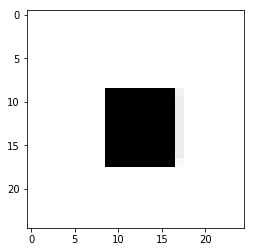

In [11]:
plt.imshow(img_gr, cmap = 'Greys')

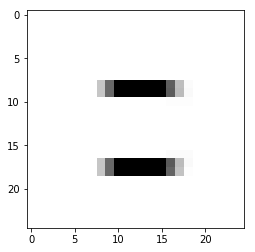

In [12]:
plt.imshow(same_conv(img_gr, h_filter), cmap = 'Greys')

In [21]:
#trying on an actual image
img = cv2.imread('sample.jpg')
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
cv2.imshow('image', img_gr)
cv2.waitKey(0)

-1

In [14]:
out = same_conv(img_gr, h_filter)

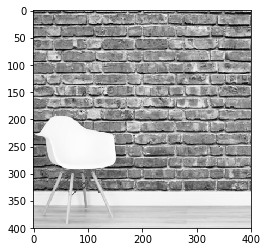

In [16]:
plt.imshow(255-img_gr, cmap = 'Greys')

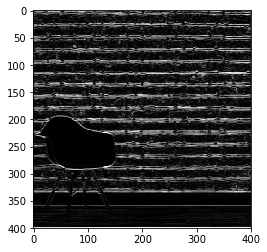

In [17]:
plt.imshow(255-out, cmap = 'Greys')